Travail en binome:
- Etudiant 1: 
        Nom & Prenom: NGUYEN Mai Ngoc Linh
        Numero d'etudiant: 11520025
- Etudiant 2:
        Nom & Prenom: HOA Minh Luan
        Numero d'etudiant: 11520026

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings('ignore')

# I. Apprentissage supervisé : Feature engineering et Classification

## I.1. Chargement des données et préparation

D'abord, on importe le jeu de donnees `credit_scoring.csv` avec la fonction `read_csv` de `pandas`. Ensuite, on separe des donnees a 2: tableau `X` et `Y` de type `numpy array`. `X` contient les valeurs caracteristiques et `Y` contient la valeur a predire (`status`).

In [2]:
df = pd.read_csv('./credit_scoring.csv', sep=';')
data = df.values
X = data[:, 0:13]
Y = data[:, 13]
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Puis, on consulte les proprietes de donnees: taille de l'echantillon avec l'attribut `shape` de `numpy array` et les statuts positifs, negatifs avec la fonction `count_nonzero()`. De plus, on utilise histogram pour afficher la distribution de chaque attribut.

X's shape:  (4375, 13)
Y's shape:  (4375,)
Nombre statuts positifs:  3159
Nombre statuts negatifs:  1216


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb56524c410>,
      dtype=object)

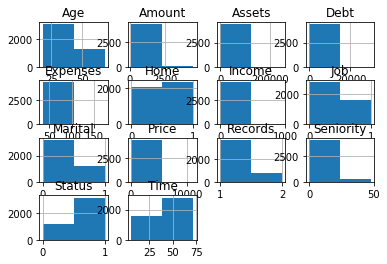

In [3]:
print("X's shape: ", X.shape)
print("Y's shape: ", Y.shape)
print("Nombre statuts positifs: ", np.count_nonzero(Y))
print("Nombre statuts negatifs: ", len(Y) - np.count_nonzero(Y))
df.hist(bins = 2)

Enfin, grace a la fonction `train_test_split()`, on divise 2 tableaux `X`, `Y` a 4: 2 tableaux pour l'apprentissage (`X_train`, `Y_train`) et 2 pour l'evaluation (`X_test`, `Y_test`).

In [4]:
from sklearn.model_selection import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y,test_size=0.5, random_state=1)

## I.2. Apprentissage et évaluation de modèles

On utilise 2 algorithmes `CART` (avec random_state=1) et K-plus-proches-voisins (avec k=5) pour l'apprentissage de donnees.

Premierement, on train les donnees par CART grace a la fonction `tree.DecisionTreeClassifier()` de `sklearn`.

[Text(200.93325389571393, 212.49818181818182, 'X[0] <= 3.5\ngini = 0.403\nsamples = 2187\nvalue = [612, 1575]'),
 Text(122.02891546906609, 202.61454545454546, 'X[5] <= 1.5\ngini = 0.491\nsamples = 906\nvalue = [391, 515]'),
 Text(78.12526182147674, 192.73090909090908, 'X[6] <= 0.5\ngini = 0.465\nsamples = 749\nvalue = [276, 473]'),
 Text(40.83408631153068, 182.84727272727272, 'X[11] <= 1035.0\ngini = 0.371\nsamples = 374\nvalue = [92, 282]'),
 Text(26.75239379635873, 172.96363636363637, 'X[8] <= 103.0\ngini = 0.264\nsamples = 211\nvalue = [33, 178]'),
 Text(18.286446392447743, 163.07999999999998, 'X[9] <= 2250.0\ngini = 0.388\nsamples = 91\nvalue = [24, 67]'),
 Text(13.99703304113284, 153.19636363636363, 'X[3] <= 30.5\ngini = 0.458\nsamples = 59\nvalue = [21, 38]'),
 Text(8.127309507754552, 143.31272727272727, 'X[7] <= 38.5\ngini = 0.391\nsamples = 45\nvalue = [12, 33]'),
 Text(3.612137559002023, 133.42909090909092, 'X[3] <= 21.5\ngini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(1.

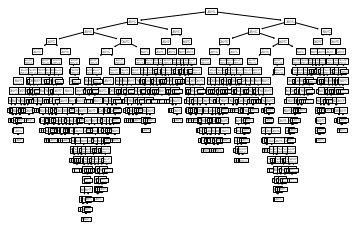

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
tree.plot_tree(clf)

Afin de consulter mieux l'abre contruit, on installe la bibliotheque `graphviz` et apres, on visualise cet abre. On sauvegarde l'image de l'abre dans fichier `CART.pdf`.

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df.columns[0:13],  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('CART')

'CART.pdf'

Deuxiemment, on train les donnees avec K-plus-proches-voisins avec la fonction `KNeighborsClassifier`.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X_train, Y_train)

Finalement, on evalue la prediction de ces algorithmes par 3 valeurs: accuracy, Rappel et Precision.

In [8]:
# Evaluation
## CART
tree_Y_pred = clf.predict(X_test)
tree_precision = metrics.precision_score(Y_test, tree_Y_pred)
tree_recall = metrics.recall_score(Y_test, tree_Y_pred)
tree_accuracy = metrics.accuracy_score(Y_test, tree_Y_pred)
print('CART ------------------------------')
print("Precision: ", tree_precision)
print("Recall: ", tree_recall)
print("Accuracy: ", tree_accuracy)
print('-----------------------------------')



## K-plus-proches-voisins
neigh_Y_pred = neigh.predict(X_test)
neigh_precision = metrics.precision_score(Y_test, neigh_Y_pred)
neigh_recall = metrics.recall_score(Y_test, neigh_Y_pred)
neigh_accuracy = metrics.accuracy_score(Y_test, neigh_Y_pred)
print('KNN -------------------------------')
print("Precision: ", neigh_precision)
print("Recall: ", neigh_recall)
print("Accuracy: ", neigh_accuracy)
print('-----------------------------------')

CART ------------------------------
Precision:  0.8194174757281554
Recall:  0.7992424242424242
Accuracy:  0.7271480804387569
-----------------------------------
KNN -------------------------------
Precision:  0.7709713024282561
Recall:  0.8819444444444444
Accuracy:  0.7248628884826326
-----------------------------------


Entre la `Presicion` et le `Rappel`, dans cette application de `credit scoring`, la `presicion` est le meilleur critère pour comparer les classifications. Car plus la `Précision` est élevée, plus le faux négatif est faible, ce qui signifie que le montant des créances irrécouvrables (pertes financières) est faible pour la banque. En outre, la `Précision` signifie la perte de client potentiel.

En basant sur l'`Accuracy` et le `Rappel` des deux algorithmes, on peut voir que la classification de `CART` est préférable de détecter les bons clients et que la classification de `KNN` est préférable de réduire le taux de fausses évaluations des mauvais emprunteurs.

## I.3. Normalisation des variables continues  

On commence normaliser des donnees avec `StandardScaler` de `sklearn`. Apres d'avoir normalise 2 tableau `X_train` et `X_test`, on a maintenant 2 tableau normalises `Xss_train` et `Xss_test`.

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss_train = ss.fit_transform(X_train)
Xss_test = ss.transform(X_test)

# re-diviser training set et test set
# (Xss_train, Xss_test, Yss_train, Yss_test) = train_test_split(Xss,Y,test_size=0.5, random_state=1)

Avec les nouveaux sets, on train ces sets avec `CART` et `KNN` et ensuite, les evalue. On voit qu'avec `CART`, les 3 valeurs `Accuracy`, `Rappel` et `Precision` changent un peu (0.81941 vs 0.81830, 0.79924 vs 0.80113 et 0.72714 vs 0.72715). D'autre part, avec `KNN`, la `Precision` augmente 4% (0.77 -> 0.81), le `Rappel` reduit 2% (0.88 -> 0.86) et l'`Accuracy` augmente 3% (0.72 -> 0.75)

In [10]:
clf_ss = tree.DecisionTreeClassifier(random_state=1)
clf_ss = clf_ss.fit(Xss_train, Y_train)

neigh_ss = KNeighborsClassifier(n_neighbors=5)
neigh_ss = neigh_ss.fit(Xss_train, Y_train)

In [11]:
# Evaluation
## CART
tree_Y_pred = clf_ss.predict(Xss_test)
tree_precision = metrics.precision_score(Y_test, tree_Y_pred)
tree_recall = metrics.recall_score(Y_test, tree_Y_pred)
tree_accuracy = metrics.accuracy_score(Y_test, tree_Y_pred)
print('CART ------------------------------')
print("Precision: ", tree_precision)
print("Recall: ", tree_recall)
print("Accuracy: ", tree_accuracy)
print('-----------------------------------')



## K-plus-proches-voisins
neigh_Y_pred = neigh_ss.predict(Xss_test)
neigh_precision = metrics.precision_score(Y_test, neigh_Y_pred)
neigh_recall = metrics.recall_score(Y_test, neigh_Y_pred)
neigh_accuracy = metrics.accuracy_score(Y_test, neigh_Y_pred)
print('KNN -------------------------------')
print("Precision: ", neigh_precision)
print("Recall: ", neigh_recall)
print("Accuracy: ", neigh_accuracy)
print('-----------------------------------')

CART ------------------------------
Precision:  0.8181818181818182
Recall:  0.8011363636363636
Accuracy:  0.7271480804387569
-----------------------------------
KNN -------------------------------
Precision:  0.8106015485407981
Recall:  0.8592171717171717
Accuracy:  0.7527422303473492
-----------------------------------


On fait meme methode pour la normalisation de `MinMaxScaler`. Malgre les differences entre 2 methode (le `Rappel` augmente dans 2 algorithmes), generalement, on voit que les 2 methodes de la normalisation sont pareils.

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

Xmm_train = mm.fit_transform(X_train)
Xmm_test = mm.transform(X_test)

# re-diviser training set et test set
# (Xmm_train, Xmm_test, Ymm_train, Ymm_test) = train_test_split(Xmm,Y,test_size=0.5, random_state=1)

In [13]:
clf_mm = tree.DecisionTreeClassifier(random_state=1)
clf_mm = clf_mm.fit(Xmm_train, Y_train)

neigh_mm = KNeighborsClassifier(n_neighbors=5)
neigh_mm = neigh_mm.fit(Xmm_train, Y_train)

In [14]:
# Evaluation
## CART
tree_Y_pred = clf_mm.predict(Xmm_test)
tree_precision = metrics.precision_score(Y_test, tree_Y_pred)
tree_recall = metrics.recall_score(Y_test, tree_Y_pred)
tree_accuracy = metrics.accuracy_score(Y_test, tree_Y_pred)
print('CART ------------------------------')
print("Precision: ", tree_precision)
print("Recall: ", tree_recall)
print("Accuracy: ", tree_accuracy)
print('-----------------------------------')



## K-plus-proches-voisins
neigh_Y_pred = neigh_mm.predict(Xmm_test)
neigh_precision = metrics.precision_score(Y_test, neigh_Y_pred)
neigh_recall = metrics.recall_score(Y_test, neigh_Y_pred)
neigh_accuracy = metrics.accuracy_score(Y_test, neigh_Y_pred)
print('KNN -------------------------------')
print("Precision: ", neigh_precision)
print("Recall: ", neigh_recall)
print("Accuracy: ", neigh_accuracy)
print('-----------------------------------')

CART ------------------------------
Precision:  0.8197674418604651
Recall:  0.8011363636363636
Accuracy:  0.7285191956124314
-----------------------------------
KNN -------------------------------
Precision:  0.8076692630317556
Recall:  0.851010101010101
Accuracy:  0.7454296160877514
-----------------------------------


##  I.4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

On fait la reduction de dimension sur 2 tableaux `Xss_Train` et `Xss_test` en utilisant `PCA` pour obtenir 3 nouvelles components.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Xpca_train = pca.fit_transform(Xss_train)

Xpca_test = pca.transform(Xss_test)

Apres de la creation de 2 nouveaux tableaux `Xpca_train` et `Xpca_test`, on commence train et evalue des donnees avec `CART` et `KNN`. On voit que les valuers de `Accuracy`, `Rappel` et `Precision` reduit fortement a cause de la reduction de dimension. 

In [16]:
clf_pca = tree.DecisionTreeClassifier(random_state=1)
clf_pca = clf_pca.fit(Xpca_train, Y_train)

neigh_pca = KNeighborsClassifier(n_neighbors=5)
neigh_pca = neigh_pca.fit(Xpca_train, Y_train)

In [17]:
# Evaluation
## CART
tree_Y_pred = clf_pca.predict(Xpca_test)
tree_precision = metrics.precision_score(Y_test, tree_Y_pred)
tree_recall = metrics.recall_score(Y_test, tree_Y_pred)
tree_accuracy = metrics.accuracy_score(Y_test, tree_Y_pred)
print('CART ------------------------------')
print("Precision: ", tree_precision)
print("Recall: ", tree_recall)
print("Accuracy: ", tree_accuracy)
print('-----------------------------------')



## K-plus-proches-voisins
neigh_Y_pred = neigh_pca.predict(Xpca_test)
neigh_precision = metrics.precision_score(Y_test, neigh_Y_pred)
neigh_recall = metrics.recall_score(Y_test, neigh_Y_pred)
neigh_accuracy = metrics.accuracy_score(Y_test, neigh_Y_pred)
print('KNN -------------------------------')
print("Precision: ", neigh_precision)
print("Recall: ", neigh_recall)
print("Accuracy: ", neigh_accuracy)
print('-----------------------------------')

CART ------------------------------
Precision:  0.7532133676092545
Recall:  0.73989898989899
Accuracy:  0.6361974405850092
-----------------------------------
KNN -------------------------------
Precision:  0.7557422969187675
Recall:  0.8516414141414141
Accuracy:  0.693327239488117
-----------------------------------


##  I.5. Sélection de variables

On trie les variables par leur importance grace a la fonction `feature_importances_` de `RandomForestClassifier`. D'apres le graphe, les 3 attributs les plus importants sont `Income`, `Seniority` et `Price`.

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


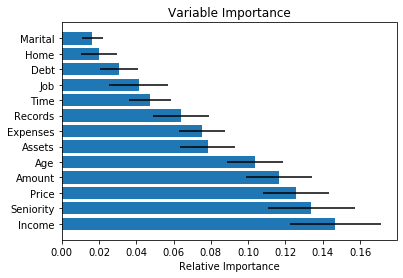

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xss_train, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = df.columns
print(features[sorted_idx])
padding = np.arange(Xss_train.size/len(Xss_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

On veut savoir qu'avec combien de variable, l'accuracy de `KNN` est plus grande. Ainsi, on affiche l'accuracy avec la nombre variables de 0 a 12. On voit qu'avec 7 variables les plus importantes, l'accuracy est le meilleur.

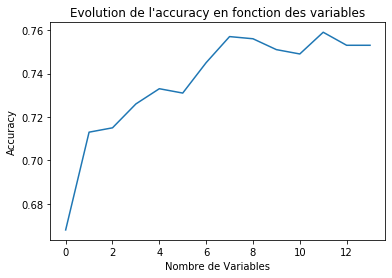

In [19]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xss_train.shape[1]+1)
for f in np.arange(0, Xss_train.shape[1]+1):
    X1_f = Xss_train[:,sorted_idx[:f+1]]
    X2_f = Xss_test[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(metrics.accuracy_score(Y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

##  I.6. Paramétrage des classifieurs

On cree une liste de parametres pour `CART` (avec `random_state` dans [0,20)) et pour `KNN` (avec `n_neighbors` dans [1,20))

In [20]:
from sklearn.model_selection import GridSearchCV

clf_param = {'random_state': range(20)}
knn_param = {'n_neighbors': range(1, 20)}
scores = ['precision', 'recall']

On trouve le meilleur parametre pour la classification de CART par 2 l'indice: la `Precision` et le `Rappel`. `GridSearchCV` retourne le meilleur `random_state=18` pour tous les 2 indices.

In [21]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree.DecisionTreeClassifier(), clf_param, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(Xss_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    Y_true, Y_pred = Y_test, clf.predict(Xss_test)
    print(metrics.classification_report(Y_true, Y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'random_state': 18}

Grid scores on development set:

0.633 (+/-0.032) for {'random_state': 0}
0.614 (+/-0.034) for {'random_state': 1}
0.619 (+/-0.029) for {'random_state': 2}
0.626 (+/-0.027) for {'random_state': 3}
0.627 (+/-0.022) for {'random_state': 4}
0.623 (+/-0.037) for {'random_state': 5}
0.628 (+/-0.026) for {'random_state': 6}
0.626 (+/-0.011) for {'random_state': 7}
0.624 (+/-0.056) for {'random_state': 8}
0.633 (+/-0.029) for {'random_state': 9}
0.622 (+/-0.008) for {'random_state': 10}
0.621 (+/-0.031) for {'random_state': 11}
0.630 (+/-0.025) for {'random_state': 12}
0.624 (+/-0.031) for {'random_state': 13}
0.624 (+/-0.031) for {'random_state': 14}
0.632 (+/-0.026) for {'random_state': 15}
0.626 (+/-0.039) for {'random_state': 16}
0.632 (+/-0.028) for {'random_state': 17}
0.636 (+/-0.035) for {'random_state': 18}
0.632 (+/-0.025) for {'random_state': 19}

Detailed classification re

On fait le meme methode pour l'algorithme KNN. Les meilleurs nombres de voisins sont `19` (pour la `Precision`) et `14` (pour le `Rappel`).

In [22]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn = GridSearchCV(KNeighborsClassifier(), knn_param, cv=5,
                       scoring='%s_macro' % score)
    knn.fit(Xss_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(knn.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = knn.cv_results_['mean_test_score']
    stds = knn.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    Y_true, Y_pred = Y_test, knn.predict(Xss_test)
    print(metrics.classification_report(Y_true, Y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 19}

Grid scores on development set:

0.636 (+/-0.038) for {'n_neighbors': 1}
0.645 (+/-0.019) for {'n_neighbors': 2}
0.655 (+/-0.055) for {'n_neighbors': 3}
0.659 (+/-0.029) for {'n_neighbors': 4}
0.679 (+/-0.030) for {'n_neighbors': 5}
0.669 (+/-0.031) for {'n_neighbors': 6}
0.689 (+/-0.057) for {'n_neighbors': 7}
0.683 (+/-0.061) for {'n_neighbors': 8}
0.695 (+/-0.054) for {'n_neighbors': 9}
0.689 (+/-0.048) for {'n_neighbors': 10}
0.706 (+/-0.031) for {'n_neighbors': 11}
0.698 (+/-0.035) for {'n_neighbors': 12}
0.712 (+/-0.035) for {'n_neighbors': 13}
0.710 (+/-0.038) for {'n_neighbors': 14}
0.708 (+/-0.044) for {'n_neighbors': 15}
0.710 (+/-0.032) for {'n_neighbors': 16}
0.709 (+/-0.048) for {'n_neighbors': 17}
0.702 (+/-0.051) for {'n_neighbors': 18}
0.714 (+/-0.053) for {'n_neighbors': 19}

Detailed classification report:

The model is trained on the full development set.
The 

##  I.7. Création d’un pipeline

On cree 2 pipelines pour le `CART` et le `KNN`. Chaque pipeline contient 3 etapes:
- Normaliser le tableau X avec `StandardScaler`
- Reduire la dimension de X avec `PCA`
- Classfier X et Y avec `CART`/`KNN`
Finalement, on calcul l'`Acurracy` de l'algorithm par appeler la fonction `score` du pipline.

In [23]:
from sklearn.pipeline import Pipeline

clf_pip = Pipeline([('ss', StandardScaler()),
                    ('pca', PCA(n_components=3)),
                    ('clf', tree.DecisionTreeClassifier(random_state=1))])
clf_pip.fit(X_train, Y_train)

tree_score =  clf_pip.score(X_test, Y_test)

print('CART\'s accuracy score: ',tree_score)

CART's accuracy score:  0.6361974405850092


In [24]:
knn_pip = Pipeline([('ss', StandardScaler()),
                    ('pca', PCA(n_components=3)),
                    ('knn', KNeighborsClassifier(n_neighbors=5))])
knn_pip.fit(X_train, Y_train)

tree_score =  knn_pip.score(X_test, Y_test)

print('KNN\'s accuracy score: ',tree_score)

KNN's accuracy score:  0.693327239488117


##  I.8. Comparaison de plusieurs algorithmes d’apprentissage

On compare plusieurs algorithmes de la classification dans le dictionaire `clfs`. Pour chaque classifieur, on d'abord calcul l'`Accuracy` moyen de `cross validation` avec `KFold(n_splits=10)`. Ensuite, on calcul la `Precision` moyen avec `KFold(n_splits=5)`. Enfin, on veut camparer l'`AUC` et le `temps execute` des algorithmes.

In [25]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time

clfs = {
    'BerNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'tree CART': tree.DecisionTreeClassifier(random_state=1),
    'MLP':MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20, 10), random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=1),
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
}


On cree la fonction `run_classifiers(clfs, X, Y, auc=True)` qui recoit un dictionaire des algorithmes de classification `clfs`, un ensemble d'attributs `X` et un ensemble de label `Y`. Cette fonction retourne un dictionaire de type `{clf: {valeurs d'evaluation}}` pour l'`Accuracy`, la `Precision`, l'`AUC` et le `temps execute`. On calcul l'`AUC`, l'`Accuracy` en utilisant `kf1` (`KFold` avec `n_splits=10`) et la `Precision` avec `kf2` (`KFold` avec `n_splits=5`).

On implemente encore une fonction `print_result(results, ls_index)` qui recois le resultat de `run_classifiers` et une liste des indices souhaitee (dans `Accuracy`, `Precision`, `AUC` et `Execution time`) pour imprimmer effectivement les valeurs d'evaluation.

In [26]:
def run_classifiers(clfs, X, Y):
    kf1 = KFold(n_splits=10, shuffle=True, random_state=0)
    kf2 = KFold(n_splits=5, shuffle=True, random_state=0)
    result = {}

    for i in clfs:
        time_start = time.time()
        clf = clfs[i]
        
        # calculer l'Accuracy par cross_val_score
        cv_acc_1 = cross_val_score(clf, X, Y, cv=kf1)
        
        # calculer la Precision par cross_val_score
        cv_acc_2 = cross_val_score(clf, X, Y, cv=kf2, scoring='precision')
        
        # Calculer l'AUC par cross validation
        aucs = []
        for train, test in kf1.split(X, Y):
            probas_ = clf.fit(X[train], Y[train]).predict_proba(X[test])
            fpr, tpr, thresholds = metrics.roc_curve(Y[test], probas_[:, 1])
            roc_auc = metrics.auc(fpr, tpr)
            aucs.append(roc_auc)
        result.update({i: {'Accuracy': (np.mean(cv_acc_1), np.std(cv_acc_1)), 
                           'AUC': (np.mean(aucs), np.std(aucs)),
                           'Precision': (np.mean(cv_acc_2), np.std(cv_acc_2)), 
                           'Execution time': (time.time() - time_start, 0.0)}
                      })
        
    return result

def print_results(results, ls_index):
    for i in results.keys():
        print('------------------------------------------------------------------------')
        print(i)
        print('------------------------------------------------------------------------')
        for index in ls_index:
            try:
                print("{0}: {1:.3f} +/- {2:.3f}".format(index, results[i][index][0], results[i][index][1]))
            except:
                print('<<< {0} >>> n\'est pas dans liste: Accuracy, AUC, Precision, Execution time'.format(index))
    #     print("AUC: {0:.3f} +/- {1:.3f}".format(np.mean(aucs), np.std(aucs)))
    #     print("Precision: {0:.3f} +/- {1:.3f}".format(np.mean(cv_acc_2), np.std(cv_acc_2)))
    #     print("Execution time: {0:.3f}s".format(time.time() - time_start))
        print('------------------------------------------------------------------------')


D'apres le resultat obtenu, on peut voir que `AdaBoost` et `Random Forest` sont 2 les algorithmes ayant l'`Accuracy` les meilleurs, par contre, `Multi-layer Perceptron` a l'`Accuracy` le plus bas. 

A propos de la `Precision`, ces algorithmes effectuent le performance parreil.

Alors que les algorithmes `BerNB`, `GaussianNB`, `Decision tree CART` et `KNN` executent pendant inferieur a une seconde, `MLP`, `Bagging`, `AdaBoost` et `Random forest` executent plus de temps (superieur a une seconde). Specialement, le `Bagging` effectue tres long (superieur a `10s`).

En comparant l'`AUC` de ces algorithmes, on peut les diviser en 2 groupes. Le 1er groupe (`Gaussian NB`, `Bagging`, `AdaBoost` et `Random Forest`) a l'`AUC` meilleur que le 2e groupe (`Bernoulli NB`, `Decision Tree CART`, `MLP` et `KNN`).

In [27]:
results = run_classifiers(clfs, X, Y)
print_results(results, ['Accuracy', 'AUC', 'Precision', 'Execution time'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
Accuracy: 0.750 +/- 0.017
AUC: 0.706 +/- 0.025
Precision: 0.787 +/- 0.013
Execution time: 0.136 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
Accuracy: 0.772 +/- 0.022
AUC: 0.791 +/- 0.026
Precision: 0.833 +/- 0.013
Execution time: 0.078 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
tree CART
------------------------------------------------------------------------
Accuracy: 0.727 +/- 0.025
AUC: 0.656 +/- 0.032
Precision: 0.804 +/- 0.011
Execution time: 0.475 +/- 0.000
-----------------------------------------------------------------------

# II. Apprentissage supervisé : Données hétérogènes

## II.1. Considérer les caractéristiques continues (numériques) du jeu de données sans les données manquantes

### Chargement des données et préparation

D'abord, on charge le jeu de donnees `credit.data` avec la fonction `read_csv()` de `pandas`. Ce dataset n'a pas encore des noms pour les colonnes, on ajoute donc le nom pour chaque colonne d'apres le site https://archive.ics.uci.edu/ml/datasets/Credit+Approval.

In [28]:
header = ['A'+str(i) for i in range(1,17)]
df = pd.read_csv('./credit.data', sep='\t', names=header)

df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


Ensuite, on remplace la valeur `?` par `np.nan` dans pandas dataframe `df` (fonction `replace()`), change le type des colonnes numeriques de `String` a `int/float` par appliquer la fonction `to_numeric()` a chaque ligne dans `df`, supprime les lignes contenant la valeur `nan` (fonction `dropna()`) et consulte la taille de l'echantillon (`shape`), le nombre d'exemples positifs/negatifs (fonction `hist()`).

(653, 16)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb56431ff90>,
      dtype=object)

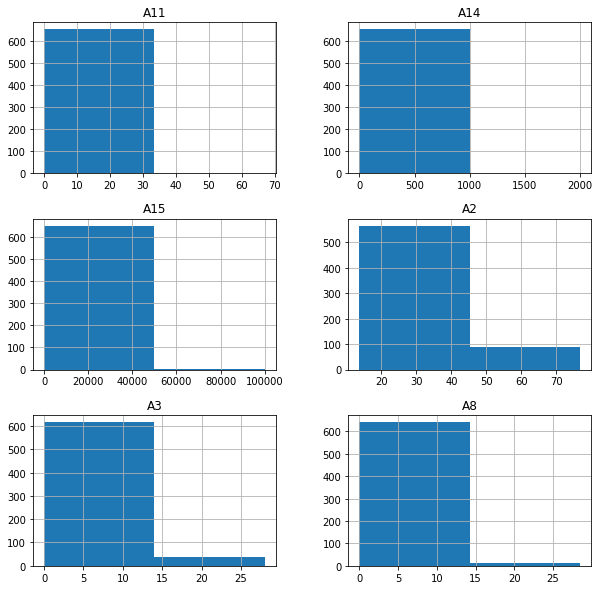

In [29]:
df_with_nan = df.replace('?', np.nan)
df_num = df_with_nan.apply(lambda r: pd.to_numeric(r, errors='ignore'))
df_drop_nan = df_num.dropna()
print(df_drop_nan.shape)
df_drop_nan.hist(bins = 2, figsize=(10,10))

Maintenant, on change le jeu de donnees en type `np.array` (`df.values`) et divise ce dataset en 2 tableaux: tableau des variables caracteristiques `X` et tableau de la variable a predire `Y`.

In [30]:
data = df_drop_nan.values
X = data[:, 0:15]
Y = data[:, 15]
print('X\'s type: ',type(X))
print('Y\'s type: ',type(Y))
print('X\'s shape: ',X.shape)
print('Y\'s shape: ',Y.shape)

X's type:  <class 'numpy.ndarray'>
Y's type:  <class 'numpy.ndarray'>
X's shape:  (653, 15)
Y's shape:  (653,)


Dans cette partie, on considere seulement les caracteristiques continues. Ainsi, on juste garde les colonnes numeriques dans `X`. Pour le faire, On definit l'indice de ces colonnes dans la tableau `num_index` et supprime les colonnes avec l'indice ne pas ayant dans cette tableau. La nouvelle tableau `X_num` contient les variables numeriques de `X`. On change le type de la tableau a `float` avec la fonction `astype()`.

In [31]:
num_index = [1,2,7,10,13,14]
X_num = X[:,num_index]
X_num = X_num.astype(float)
print(X_num.dtype)
X_num.shape

float64


(653, 6)

Tableau Y maintenant contient un ensemble des valeur `+` et `-`. On a besoin de transformer ces valeurs au type numerique pour appliquer les algorithmes de classification de `sklearn`. Ainsi, on remplace le `+` par `1`, le `-` par `0` et convertit le type de la tableau de `String ` a `float`.

In [32]:
Y[Y == '+'] = 1
Y[Y == '-'] = 0
Y = Y.astype(float)
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Apres du pre-traitement du jeu de donnees, on marche la fonction `run_classifiers()` avec `X_num` et `Y` pour compare le performance des algorithmes. D'apres l'`AUC`, on peut voir que dans ce cas, `Random Forest` est le meilleur et `MLP` est le mauvais. 

In [33]:
results_num = run_classifiers(clfs, X_num, Y)
print_results(results_num, ['AUC'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
AUC: 0.747 +/- 0.069
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
AUC: 0.798 +/- 0.054
------------------------------------------------------------------------
------------------------------------------------------------------------
tree CART
------------------------------------------------------------------------
AUC: 0.733 +/- 0.047
------------------------------------------------------------------------
------------------------------------------------------------------------
MLP
------------------------------------------------------------------------
AUC: 0.509 +/- 0.167
------------------------------------------------------------------------
---------

### Normalisation des variables continues

Avant de marcher la fonction `run_classifiers()`, on normalise la tableau X avec `StandardScaler` et `MinMaxScaler` de `sklearn`.

In [34]:
ss = StandardScaler()
mm = MinMaxScaler()
Xss = ss.fit_transform(X_num)
Xmm = mm.fit_transform(X_num)

Apres de la normalisation par `StandardScaler`, les classificateurs donnent un meilleur performance. Specialement, l'`AUC` de `MLP` ameliore fortement.

In [35]:
results_ss = run_classifiers(clfs, Xss, Y)
print_results(results_ss, ['AUC'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
AUC: 0.804 +/- 0.048
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
AUC: 0.798 +/- 0.054
------------------------------------------------------------------------
------------------------------------------------------------------------
tree CART
------------------------------------------------------------------------
AUC: 0.736 +/- 0.046
------------------------------------------------------------------------
------------------------------------------------------------------------
MLP
------------------------------------------------------------------------
AUC: 0.767 +/- 0.056
------------------------------------------------------------------------
---------

La normalisation de `MinMaxScaler` donne un resultat parreil que le `StandardScaler`.

In [36]:
results_mm = run_classifiers(clfs, Xmm, Y)
print_results(results_mm, ['AUC'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
AUC: 0.747 +/- 0.069
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
AUC: 0.798 +/- 0.054
------------------------------------------------------------------------
------------------------------------------------------------------------
tree CART
------------------------------------------------------------------------
AUC: 0.734 +/- 0.048
------------------------------------------------------------------------
------------------------------------------------------------------------
MLP
------------------------------------------------------------------------
AUC: 0.822 +/- 0.048
------------------------------------------------------------------------
---------

## II.2. Considérer la totalité de la base originale

### Traitement de données manquantes 

D'abord, on transform le jeu de donnees a type de `np.array` et divise les caracteristiques variable / la variable a predire,dans 2 tableaux `X` et `Y`.

In [37]:
data = df.values
X = data[:, 0:15]
Y = data[:, 15]

Dans la tableau `X`, on obtient la position des colonnes numeriques et categorielles (tableau `col_num` et `col_cat`). Puis, on divise le `X` en 2 tableaux `X_cat` contenant les colonnes categorielles et `X_num` qui contient les colonnes numeriques. Dans `X_cat`, il y a des valeurs de types `String`, on doit changer ces valeur a `float` (par assigner un indice par chaque valeur) pour pouvoir appliquer les fonctions de classification. Enfin, on utilise la fonction `Imputer()` de `sklearn` afin de remplacer les valeurs manquantes (par la valeur le plus frequente pour `X_cat` et la valeur moyenne pour `X_num`).

In [38]:
from sklearn.preprocessing import Imputer

col_num = [1,2,7,10,13,14]
col_cat = [0,3,4,5,6,8,9,11,12]

X_cat = np.copy(X[:, col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
    
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

print(X_cat.shape)

X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

print(X_num.shape)

(688, 9)
(688, 6)


### Traitement de variables catégorielles 

Pour pouvoir utiliser les variables categorielles dans les algorithmes d’apprentissage supervise de la fonction `run_classifiers`, une solution consiste a transformer chaque variable categorielle avec `m` modalites en `m` variables binaires dont une seule sera active. Pour cela utiliser le module `OneHotEncoder` de `sklearn` pour encoder les 9 variables categorielles du jeu de donnees.

In [39]:
from sklearn.preprocessing import OneHotEncoder

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
X_cat_bin.shape

(688, 40)

### Construction du jeu de données

On finit l'etape de pre-traitement de donnees par combiner 2 tableaux `X_num` (apres d'etre normalise) et `X_cat` (apres d'etre applique `OneHotEncoder`) a la tableau `X_final`. A props de la tableau `Y`, on change aussi son type a `float` et ses valeurs (`+`, `-`) a (`1`, `0`).

In [40]:
ss = StandardScaler()

Xss_num = ss.fit_transform(X_num)

X_final = np.append(X_cat_bin, Xss_num, axis=1)

Y[Y == '+'] = 1
Y[Y == '-'] = 0
Y = Y.astype(float)

print(X_final.shape)
print(Y.dtype)

(688, 46)
float64


Enfin, on marche la fonction `run_classifiers()` avec les tableaux pre-traite `X_final` et `Y`. En comparant avec le resultat de la partie `II.1`, on peut voir que l'`AUC` de tous les algorithmes augmentent fortement.

In [41]:
results = run_classifiers(clfs, X_final, Y)
print_results(results, ['AUC'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
AUC: 0.923 +/- 0.033
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
AUC: 0.878 +/- 0.044
------------------------------------------------------------------------
------------------------------------------------------------------------
tree CART
------------------------------------------------------------------------
AUC: 0.832 +/- 0.039
------------------------------------------------------------------------
------------------------------------------------------------------------
MLP
------------------------------------------------------------------------
AUC: 0.866 +/- 0.042
------------------------------------------------------------------------
---------

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

## III.0. Chargement des données et préparation

On charge premierement le jeu de donnees `SMSSpamCollection.data` et le consulte sa taille (`shape`) et son type de donees (`dtypes`). On affiche aussi ses 5 de premieres lignes. 

In [42]:
df = df = pd.read_csv('./SMSSpamCollection.data', sep='\t', header = None)

print(df.shape)
print(df.dtypes)
df.head(5)

(5572, 2)
0    object
1    object
dtype: object


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Deuxiemment, on transforme le type du dataset a `np.array`, le divise a 2 tableaux `X`, `Y` et convertit le type de tableau `Y`, change les valeurs (`ham`, `spam`) dans `Y` a (`0`,`1`).

In [43]:
data = df.values

Y = data[:, 0]
Y[Y == 'ham'] = 0
Y[Y == 'spam'] = 1
Y = Y.astype(float)

X = data[:,1]

Comme le temps d'execution de NLP est tres long, on supprimme quelques algorithmes dans `clfs` (partie `I.8`) pour economiser le temps. Debut cette partie, on utilise le `clfs_2` au lieu du `clfs` afin de consulter la performance des methode d'traitement de donnees.

In [44]:
clfs_2 = {
    'BerNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
#     'KNN': KNeighborsClassifier(n_neighbors=5),
    'RF': RandomForestClassifier(n_estimators=50, random_state=1)
}


## III.1. CountVectorizer

On utilise `CountVectorizer()` de `sklearn` afin de splitter chaque texte en differents mots cles (termes), supprimer les mots cles vides et calculer la matrice de co-occurences. On transforme le `X` pour obtenir le `XcountVec`.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
XcountVec = vectorizer.fit_transform(X).toarray()
XcountVec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

En utilisant la tableau `XcountVec`, on marche la fonction `run_classifiers()` et consulte le resultat par les indices l`Accuracy`, l'`AUC` la `Precision` et le `temps d'execution`. On peut voir que tous les algorithmes donnent des bons resultats (sauf `GaussianNB` avec la `Precision` bas). 

In [46]:
results = run_classifiers(clfs_2, XcountVec, Y)
print_results(results, ['Accuracy', 'AUC', 'Precision', 'Execution time'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
Accuracy: 0.982 +/- 0.002
AUC: 0.995 +/- 0.003
Precision: 0.981 +/- 0.012
Execution time: 14.335 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
Accuracy: 0.900 +/- 0.016
AUC: 0.906 +/- 0.015
Precision: 0.578 +/- 0.039
Execution time: 23.687 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
RF
------------------------------------------------------------------------
Accuracy: 0.977 +/- 0.006
AUC: 0.993 +/- 0.005
Precision: 0.999 +/- 0.003
Execution time: 275.247 +/- 0.000
------------------------------------------------------------------------


## III.2. Tf–idf term weighting

On applique le `Tf-idf term weighting` comme une mesure statistique utilisee pour la normalisation et la ponderation de l’importance d’un terme contenu dans un document, relativement a toute la collection des documents (ici les `SMS`). On transforme `XcountVec` pour obtenir le `Xtfidf`.

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
Xtfidf = transformer.fit_transform(XcountVec).toarray()
Xtfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

On marche maintenant la fonction `run_classifiers()` et compare les resultats obtenus avec l'etape precedente. On peut voir ces resultats decroissent un peu.

In [48]:
results = run_classifiers(clfs_2, Xtfidf, Y)
print_results(results, ['Accuracy', 'AUC', 'Precision', 'Execution time'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
Accuracy: 0.982 +/- 0.002
AUC: 0.995 +/- 0.003
Precision: 0.981 +/- 0.012
Execution time: 12.789 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
Accuracy: 0.897 +/- 0.016
AUC: 0.893 +/- 0.016
Precision: 0.571 +/- 0.041
Execution time: 20.947 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
RF
------------------------------------------------------------------------
Accuracy: 0.978 +/- 0.005
AUC: 0.991 +/- 0.005
Precision: 1.000 +/- 0.000
Execution time: 282.008 +/- 0.000
------------------------------------------------------------------------


## III.3. TruncatedSVD

Pour diminuer la dimension de `X`, on applique `TruncatedSVD` en `Xtfidf`.

In [49]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
Xsvd = svd.fit_transform(Xtfidf)
Xsvd

array([[ 0.06731618,  0.00825149,  0.02146143, -0.03914455,  0.02303549],
       [ 0.02964514,  0.095512  ,  0.23773838,  0.07591599, -0.0117622 ],
       [ 0.09077274,  0.00074463, -0.00151597, -0.06930993, -0.11813649],
       ...,
       [ 0.11035178, -0.00399553,  0.00634861, -0.05590653,  0.04434917],
       [ 0.19543606, -0.01279772,  0.02314606, -0.13057616,  0.00744434],
       [ 0.07834232, -0.01400183,  0.01924183, -0.05864795, -0.02537809]])

En utilisant le `Xsvd`, on voit que le temps d'execution decroit fortement (= 1/30 en comparant avec l'utilisation du `Xtfidf`) alors que les valeurs `Accuracy`, `AUC` et `Precision` decroit un peu.

In [50]:
results = run_classifiers(clfs_2, Xsvd, Y)
print_results(results, ['Accuracy', 'AUC', 'Precision', 'Execution time'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
Accuracy: 0.889 +/- 0.017
AUC: 0.884 +/- 0.021
Precision: 0.668 +/- 0.063
Execution time: 0.112 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
Accuracy: 0.913 +/- 0.009
AUC: 0.946 +/- 0.010
Precision: 0.632 +/- 0.037
Execution time: 0.070 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
RF
------------------------------------------------------------------------
Accuracy: 0.961 +/- 0.009
AUC: 0.967 +/- 0.009
Precision: 0.889 +/- 0.028
Execution time: 7.993 +/- 0.000
------------------------------------------------------------------------


## III.4. Pipeline

On veut a ce moment creer un pipeline pour faire tous les etape de pretraitement de la tableau `X`. Ainsi, on cree le pipeline `pip` qui va faire `CountVectorizer()`, `TfidfTransformer()` et `TruncatedSVD` en `X`. On obtient finalement la tableau `Xpip` pre-traitee.

In [51]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer(smooth_idf=False)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

pip = Pipeline([('countVec', CountVectorizer()),
                ('tfidf', TfidfTransformer(smooth_idf=False)),
                ('svd', TruncatedSVD(n_components=5, n_iter=7, random_state=42))])

Xpip = pip.fit_transform(X)
Xpip

array([[ 0.06731618,  0.00825149,  0.02146143, -0.03914455,  0.02303549],
       [ 0.02964514,  0.095512  ,  0.23773838,  0.07591599, -0.0117622 ],
       [ 0.09077274,  0.00074463, -0.00151597, -0.06930993, -0.11813649],
       ...,
       [ 0.11035178, -0.00399553,  0.00634861, -0.05590653,  0.04434917],
       [ 0.19543606, -0.01279772,  0.02314606, -0.13057616,  0.00744434],
       [ 0.07834232, -0.01400183,  0.01924183, -0.05864795, -0.02537809]])

En appliquant `run_classifiers` a `Xpip`, on voit que les resultats obtenus sont egaux que les resultats obtenus par `Xsvd`. Ainsi, on peut assurer le vrai du pipeline `pip`.

In [52]:
results = run_classifiers(clfs_2, Xpip, Y)
print_results(results, ['Accuracy', 'AUC', 'Precision', 'Execution time'])

------------------------------------------------------------------------
BerNB
------------------------------------------------------------------------
Accuracy: 0.889 +/- 0.017
AUC: 0.884 +/- 0.021
Precision: 0.668 +/- 0.063
Execution time: 0.107 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
GaussianNB
------------------------------------------------------------------------
Accuracy: 0.913 +/- 0.009
AUC: 0.946 +/- 0.010
Precision: 0.632 +/- 0.037
Execution time: 0.073 +/- 0.000
------------------------------------------------------------------------
------------------------------------------------------------------------
RF
------------------------------------------------------------------------
Accuracy: 0.961 +/- 0.009
AUC: 0.967 +/- 0.009
Precision: 0.889 +/- 0.028
Execution time: 8.102 +/- 0.000
------------------------------------------------------------------------


## III.5. Application sur un autre jeu de données

On applique les etapes precedents a un autre jeu de donnees `yepl-text-by-stars.csv`. 

In [53]:
df = pd.read_csv('./yelp-text-by-stars.csv', sep=';', encoding='iso-8859-16')
df

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
...,...,...
47366,5,This is our favorite coffee place in Montreal!...
47367,5,Had to visit the Carlos bakery and went on a s...
47368,5,Some of the best Tom Yum we've ever had. Also ...
47369,5,"This is the best groomer in the valley, she is..."


D'abord, on transforme le type du jeu de donnees a `np.array` et le divise a 2 tableaux `X`, `Y`.

In [54]:
data = df.values

Y = data[:,0].astype(float)
X = data[:, 1]

Ensuite, on continue a separe le training set (`X_train`, `Y_train`) et le test set (`X_test`, `Y_test`).

In [55]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y,test_size=0.3, random_state=1)

Puis, on transforme `X_train`, `X_test` avec le pipeline `pip`.

In [57]:
Xpip_train = pip.fit_transform(X_train)
Xpip_test = pip.transform(X_test)

Enfin, on applique les classificateurs dans `clfs_2` au `training set` et calcul l'`Accuracy` de chaque algorithme avec le `test set`. 

Note: Comme la tableau `Y` maintenant n'est pas binaire (la valeur entre `1` et `5`), on ne peut pas marcher la fonction `run_classifier()` pour appliquer rapidement les algorithmes de classification.

In [58]:
for i in clfs_2:
    clf = clfs_2[i]
    clf.fit(Xpip_train, Y_train)
    print('{0}\'s Accuracy: {1:.3f}'.format(i, clf.score(Xpip_test, Y_test)))

BerNB's Accuracy: 0.453
GaussianNB's Accuracy: 0.472
RF's Accuracy: 0.468
